<a href="https://colab.research.google.com/github/belaz1918/CNN-Explainer/blob/master/CNN_CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

STEP #2: VISUALIZE DATA

array([[[242, 243, 250],
        [242, 243, 250],
        [244, 244, 252],
        ...,
        [245, 244, 249],
        [245, 244, 249],
        [244, 244, 248]],

       [[245, 243, 250],
        [245, 243, 250],
        [245, 244, 251],
        ...,
        [245, 244, 249],
        [245, 244, 249],
        [244, 243, 248]],

       [[247, 245, 250],
        [246, 244, 249],
        [246, 244, 249],
        ...,
        [245, 244, 249],
        [245, 244, 249],
        [245, 243, 248]],

       ...,

       [[111, 135, 144],
        [108, 128, 139],
        [113, 130, 142],
        ...,
        [110, 127, 135],
        [102, 119, 127],
        [ 93, 112, 120]],

       [[103, 127, 138],
        [105, 126, 137],
        [101, 120, 131],
        ...,
        [100, 117, 126],
        [ 98, 115, 123],
        [ 96, 115, 123]],

       [[ 88, 113, 128],
        [ 85, 108, 121],
        [ 88, 108, 120],
        ...,
        [108, 126, 137],
        [108, 126, 137],
        [105, 123, 135]]], dtype=uint8)
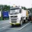

In [ ]:
# print (y_train[1000])
# plt.imshow(X_train[1000])

X_train[1000]


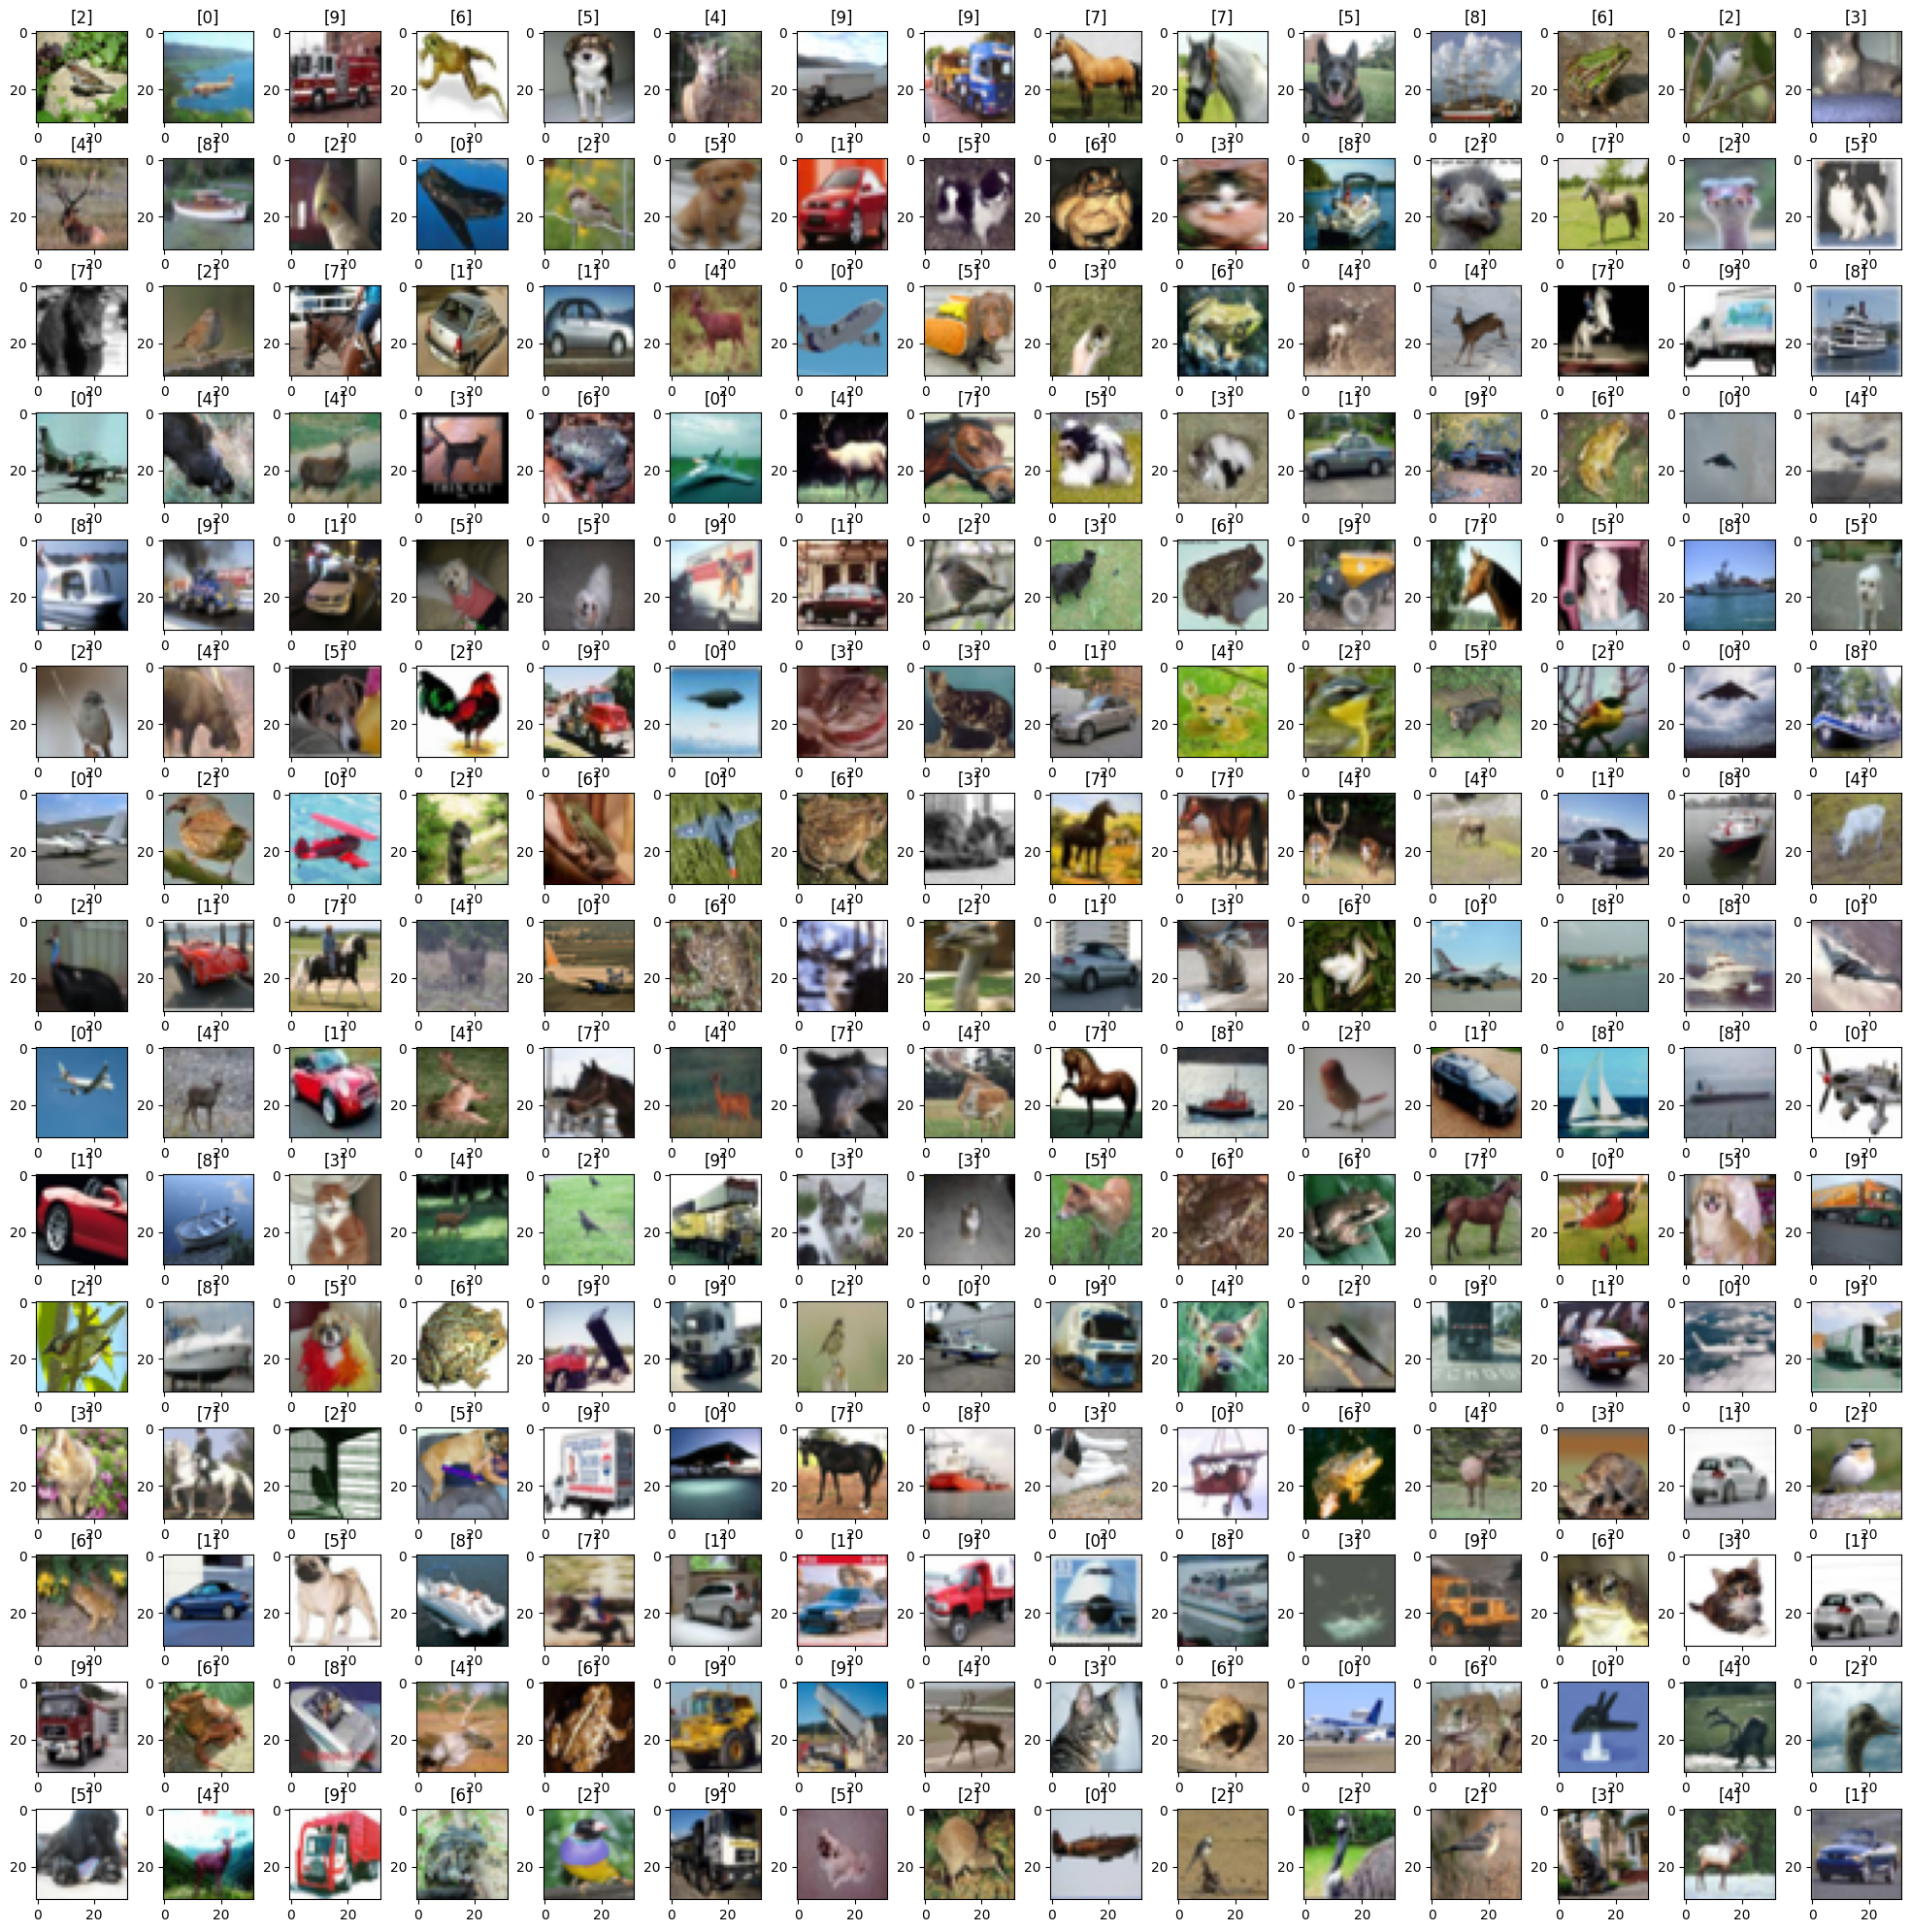

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(X_train)
for i in range(L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    # axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)
#

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [ ]:
import keras
# from keras.utils import np_utils
y_train = keras.utils.to_categorical(y_train, 10)
# y_test = np_utils.to_categorical(y_test, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001, decay = 1e-5), metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 108ms/step - accuracy: 0.2209 - loss: 2.0529 - val_accuracy: 0.4464 - val_loss: 1.5336
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 107ms/step - accuracy: 0.4291 - loss: 1.5551 - val_accuracy: 0.5120 - val_loss: 1.3592


In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5169 - loss: 1.3534
Test Accuracy: 0.5120000243186951


In [ ]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
  y_test

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\n True = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
plt = sns.heatmap(cm, annot = True)


Save the model

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)